# Boosting

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

<center><img src='https://i.imgur.com/Nndl37F.png'></center>

## How Boosting Works?

1. Samples generated from the training set are assigned the same weight to start with. These samples are used to train a homogeneous weak learner or base model.

2. The prediction error for a sample is calculated – the greater the error, the weight of the sample increases. Hence, the sample becomes more important for training the next base model.

3. The individual learner is weighted too – does well on its predictions, gets a higher weight assigned to it. So, a model that outputs good predictions will have a higher say in the final decision.

4. The weighted data is then passed on to the following base model, and steps 2) and 3) are repeated until the data is fitted well enough to reduce the error below a certain threshold.

5. When new data is fed into the boosting model, it is passed through all individual base models, and each model makes its own weighted prediction.

6. Weight of these models is used to generate the final prediction. The predictions are scaled and aggregated to produce a final prediction.

<center> <img src='https://i.imgur.com/9uoELsY.jpg'></center>
<table>
<caption>Bagging Vs Boosting</caption> 
<tr>
<th>Bagging</th> 	
<th>Boosting</th>
</tr>

<tr>
<td>Various training data subsets are randomly drawn with replacement from the whole training dataset</td>
<td>Each new subset contains the components that were misclassified by previous models.</td>
</tr>

<tr>
<td>Bagging attempts to tackle the over-fitting issue.</td>
<td>Boosting tries to reduce bias.</td>
</tr>

<tr>
<td>If the classifier is unstable (high variance), then we need to apply bagging</td>
<td>If the classifier is steady and straightforward (high bias), then we need to apply boosting.</td>
</tr>

<tr>
<td>Every model receives an equal weight.</td>
<td>Models are weighted by their performance.</td>
</tr>

<tr> 	
<td>Objective to decrease variance, not bias.</td> 	
<td>Objective to decrease bias, not variance.</td>
</tr>

<tr>
<td>It is the easiest way of connecting predictions that belong to the same type.</td> 	
<td>It is a way of connecting predictions that belong to the different types.
</td>
</tr> 	
<tr>
<td>Every model is constructed independently.</td>
<td>New models are affected by the performance of the previously developed model.</td>
<tr>
</table>

## Types of Boosting Algorithms

Boosting algorithms can differ in how they create and aggregate weak learners during the sequential process. Three popular types of boosting methods include: 

- **Adaptive boosting or AdaBoost:** Yoav Freund and Robert Schapire are credited with the creation of the AdaBoost algorithm. This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.  

- **Gradient boosting:** Building on the work of Leo Breiman, Jerome H. Friedman developed gradient boosting, which works by sequentially adding predictors to an ensemble with each one correcting for the errors of its predecessor. However, instead of changing weights of data points like AdaBoost, the gradient boosting trains on the residual errors of the previous predictor. The name, gradient boosting, is used since it combines the gradient descent algorithm and boosting method.  

- **Extreme gradient boosting or XGBoost:** XGBoost is an implementation of gradient boosting that’s designed for computational speed and scale. XGBoost leverages multiple cores on the CPU, allowing for learning to occur in parallel during training.  


### AdaBoost

AdaBoost also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. These trees are also called **Decision Stumps.**

<center><img src='https://i.imgur.com/0rDEc0l.png' ></center>

Each instance in the training dataset is weighted. The initial weight is set to:

$weight(x_i) = 1/n$

Where $x_i$ is the $i^{th}$ training instance and n is the number of training instances.


What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lower error is received.
<center><img src='https://i.imgur.com/81M84xY.png'></center>


### How To Train One Model

A weak classifier (decision stump) is prepared on the training data using the weighted samples. Only binary (two-class) classification problems are supported, so each decision stump makes one decision on one input variable and outputs a **+1.0 or -1.0** value for the first or second class value.

The misclassification rate is calculated for the trained model. Traditionally, this is calculated as:

**error = (correct – N) / N**

Where error is the misclassification rate, correct are the number of training instance predicted correctly by the model and N is the total number of training instances. For example, if the model predicted 78 of 100 training instances correctly the error or misclassification rate would be (78-100)/100 or 0.22.

This is modified to use the weighting of the training instances:

**error = sum(w(i) * t_error(i)) / sum(w)**

Which is the weighted sum of the misclassification rate, 

where w is the weight for training instance i and 

t_error is the prediction error for training instance i which is **1 if misclassified and 0 if correctly classified.**

**For example,** 

if we had 3 training instances with the weights 0.01, 0.5 and 0.2. 

The predicted values were -1, -1 and -1, and the actual output variables in the instances were -1, 1 and -1, then the terrors would be 0, 1, and 0. 

The misclassification rate would be calculated as:

**error = (0.01x0 + 0.5x1 + 0.2x0) / (0.01 + 0.5 + 0.2)**

or

**error = 0.704**

A stage value is calculated for the trained model which provides a weighting for any predictions that the model makes. 

The stage value for a trained model is calculated as follows:

**stage = (1/2) *ln((1-error) / error)**

Where stage is the stage value used to weight predictions from the model, ln() is the natural logarithm and error is the misclassification error for the model. The effect of the stage weight is that more accurate models have more weight or contribution to the final prediction.

The training weights are updated giving more weight to incorrectly predicted instances, and less weight to correctly predicted instances.

For example, the weight of one training instance (w) is updated using:

**w = w * exp(stage * t_error)**

Where 
w is the weight for a specific training instance, 

exp() is the numerical constant e or Euler’s number raised to a power, 

stage is the misclassification rate for the weak classifier and 

t_error is the error the weak classifier made predicting the output variable for the training instance, evaluated as:

**t_error = 0 if(y == p), otherwise 1**

Where 

y is the output variable for the training instance and 

p is the prediction from the weak learner.

This has the effect of not changing the weight if the training instance was classified correctly and making the weight slightly larger if the weak learner misclassified the instance.








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")


train=pd.read_csv("Bank_churn.csv")
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# converting gender to 0 and 1 
# drop non numeric columns 

Gender=pd.get_dummies(train['Gender'],drop_first=True)
train=pd.concat([train,Gender], axis=1)
train.drop(['RowNumber','Surname','Geography','Gender'], axis=1, inplace=True)

In [ ]:
train.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0


In [ ]:
# split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), 
                                                    train['Exited'], test_size=0.2, 
                                                    random_state=101)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier(random_state=1)

model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
pred_1 = model.predict(X_test)

In [ ]:
print(accuracy_score(pred_1,y_test))

0.8535


In [ ]:
print(classification_report(pred_1,y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1724
           1       0.48      0.74      0.58       276

    accuracy                           0.85      2000
   macro avg       0.72      0.80      0.75      2000
weighted avg       0.89      0.85      0.87      2000



In [ ]:
# Adaboost with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,
                                                      max_features=4,
                                                      min_samples_leaf=20),
                                n_estimators=200)


dt_classifier.fit(X_train,y_train)


pred_2 = dt_classifier.predict(X_test)

print('Accuracy Score',accuracy_score(pred_2,y_test))

print()

print('classification report:\n\t',classification_report(pred_2,y_test))

Accuracy Score 0.8545

classification report:
	               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1730
           1       0.48      0.74      0.58       270

    accuracy                           0.85      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.89      0.85      0.87      2000



In [ ]:
# Adaboost with Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_classifier = AdaBoostClassifier(base_estimator=LogisticRegression(),
                                n_estimators=200,learning_rate=0.001)


lr_classifier.fit(X_train,y_train)


pred_3 = lr_classifier.predict(X_test)

print('Accuracy Score',accuracy_score(pred_3,y_test))

print()

print('classification report:\n\t',classification_report(pred_3,y_test))

Accuracy Score 0.7885

classification report:
	               precision    recall  f1-score   support

           0       1.00      0.79      0.88      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.79      2000
   macro avg       0.50      0.39      0.44      2000
weighted avg       1.00      0.79      0.88      2000



### Gradient Boosting Tree

In Machine Learning, we use gradient boosting to solve classification and regression problems. It is a sequential ensemble learning technique where the performance of the model improves over iterations. 

This method creates the model in a stage-wise fashion. It infers the model by enabling the optimization of an absolute differentiable loss function. As we add each weak learner, a new model is created that gives a more precise estimation of the response variable.

The gradient boosting algorithm requires the below components to function:

1. **Loss function:** To reduce errors in prediction, we need to optimize the loss function. Unlike in AdaBoost, the incorrect result is not given a higher weightage in gradient boosting. It tries to reduce the loss function by averaging the outputs from weak learners.

2. **Weak learner:** In gradient boosting, we require weak learners to make predictions. To get real values as output, we use regression trees. To get the most suitable split point, we create trees in a greedy manner, due to this the model overfits the dataset.

3. **Additive model:** In gradient boosting, we try to reduce the loss by adding decision trees. Also, we can minimize the error rate by cutting down the parameters. So, in this case, we design the model in such a way that the addition of a tree does not change the existing tree.

Finally, we update the weights to minimize the error that is being calculated.




**The Algorithm:**

- Calculate the average of the label column as initially this average shall minimise the total error.
- Calculate the pseudo residuals.

$Pseudo__residual= actual label - the predicted result (which is average in the first iteration)$

  Mathematically,
  
derivative of the pseudo residual=$(\frac {\delta L(y_i,f(x_i))}{\delta (f(x_i))})$
     
where, L is the loss function.
                          
               
Here, the gradient of the error term is getting calculated as the goal is to minimize the error. Hence the name gradient boosted trees
- create a tree to predict the pseudo residuals instead  of a tree to predict for the actual column values.
- new result= previous result+learning rate* residual 
   
   Mathematically, 
     $ F_1(x)= F_0(x)+ \nu \sum \gamma $
     
 where  $ \nu $ is the learning rate and $ \gamma $ is the residual

Repeat these steps until the residual stops decreasing


# [For More info Click Here 👈](https://xgboost.readthedocs.io/en/stable/tutorials/model.html)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

url='https://raw.githubusercontent.com/ubaid-shah/datasets/main/Bank_churn.csv'
train=pd.read_csv(url)


# converting gender to 0 and 1 
# drop non numeric columns 

Gender=pd.get_dummies(train['Gender'],drop_first=True)
train=pd.concat([train,Gender], axis=1)
train.drop(['RowNumber','Surname','Geography','Gender'], axis=1, inplace=True)

# split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), 
                                                    train['Exited'], test_size=0.2, 
                                                    random_state=101)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

sklearn_gbm = GradientBoostingClassifier(
    n_estimators=20, 
    learning_rate=0.1, 
    max_depth=1
)
sklearn_gbm.fit(X_train, y_train)
sklearn_gbm_log_loss = log_loss(y_test, sklearn_gbm.predict_proba(X_test))
print(f"Scikit-learn GBM Log-Loss:{sklearn_gbm_log_loss:.15f}")

Scikit-learn GBM Log-Loss:0.426210640854544


In [ ]:
pred_4 = sklearn_gbm.predict(X_test)

print('Accuracy Score',accuracy_score(pred_4,y_test))

print()

print('classification report:\n\t',classification_report(pred_4,y_test))

Accuracy Score 0.8065

classification report:
	               precision    recall  f1-score   support

           0       1.00      0.80      0.89      1960
           1       0.09      0.95      0.16        40

    accuracy                           0.81      2000
   macro avg       0.54      0.88      0.53      2000
weighted avg       0.98      0.81      0.88      2000



### XGBoost

XGBoost stands for eXtreme Gradient Boosting.

When it comes to a superfast machine learning algorithm that works on tree-based models and tries to reach the best in class accuracy by optimally using computational resources, XGBoost or Extreme Gradient Boosting becomes the most natural choice. Created by Tianqi Chen, the XGBoost algorithm has recently got so much popularity owing to its massive usage in most of the hackathons and Kaggle competitions. 

![](https://i.imgur.com/mSAEqqm.png)

In simple terms, XGBoost may be formally defined as a decision tree-based ensemble learning framework that uses Gradient Descent as the underlying objective function and comes with a lot of flexibility while delivering the desired results by optimally using computational power. 

## What Algorithm Does XGBoost Use?

The XGBoost library implements the gradient boosting decision tree algorithm.

This algorithm goes by lots of different names such as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines.

Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm that weights data points that are hard to predict.

Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

This approach supports both regression and classification predictive modeling problems.

##  Unique features of XGBoost:

XGBoost is a popular implementation of gradient boosting. Let’s discuss some features of XGBoost that make it so interesting.
 
**Regularisation:**

XGBoost has an option to penalise complex models through both L1 and L2 regularisation. Regularisation helps in preventing overfitting.

**Handling sparse data:** 

Missing values or data processing steps like one-hot encoding make data sparse. XGBoost incorporates a sparsity-aware split finding algorithm to handle different types of sparsity patterns in the data.

**Weighted quantile sketch:**

Most existing tree based algorithms can find the split points when the data points are equal weights (using a quantile sketch algorithm). However, they are not equipped to handle weighted data. XGBoost has a distributed weighted quantile sketch algorithm to handle weighted data effectively.

**Block structure for parallel learning:**

For faster computing, XGBoost can use multiple cores on the CPU. This is possible because of a block structure in its system design. Data is sorted and stored in in-memory units called blocks. Unlike other algorithms, this enables the data layout to be reused by subsequent iterations instead of computing it again. This feature also serves useful for steps like split finding and column sub-sampling.

**Cache awareness:**

In the XGBoost classifier algorithm, non-continuous memory access is required to get the gradient statistics by row index. Hence, XGBoost has been designed to make optimal use of hardware. This is done by allocating internal buffers in each thread, where the gradient statistics can be stored.

**Out-of-core computing:** 

This feature optimises the available disk space and maximises its usage when handling huge datasets that do not fit into memory.



In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

url='https://raw.githubusercontent.com/ubaid-shah/datasets/main/Bank_churn.csv'
train=pd.read_csv(url)


# converting gender to 0 and 1 
# drop non numeric columns 

Gender=pd.get_dummies(train['Gender'],drop_first=True)
train=pd.concat([train,Gender], axis=1)
train.drop(['RowNumber','Surname','Geography','Gender'], axis=1, inplace=True)

# split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), 
                                                    train['Exited'], test_size=0.2, 
                                                    random_state=101)


In [ ]:
import xgboost as xgb
xg_model = xgb.XGBClassifier(random_state=1,
                             learning_rate=0.01)
xg_model.fit(X_train,y_train)

XGBClassifier(learning_rate=0.01, random_state=1)

In [ ]:
pred_5 = xg_model.predict(X_test)

In [ ]:
print(accuracy_score(pred_5,y_test))

0.857


With more number of Hyper parameters

[For more details click here 👈](https://xgboost.readthedocs.io/en/stable/parameter.html)

In [ ]:
new_xbg_model = xgb.XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=0.5,
                              colsample_bynode=0.5, colsample_bytree=0.5, gamma=0, gpu_id=0,
                              importance_type='gain', interaction_constraints='',
                              learning_rate=0.05, max_delta_step=0, max_depth=3,
                              min_child_weight=1, monotone_constraints='(1,0)',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              objective='binary:logistic', random_state=211, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1, verbosity=0)

In [ ]:
new_xbg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.2, colsample_bylevel=0.5, colsample_bynode=0.5,
              colsample_bytree=0.5, gpu_id=0, interaction_constraints='',
              learning_rate=0.05, monotone_constraints='(1,0)',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              random_state=211, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [ ]:
pred_6 = xg_model.predict(X_test)
print(accuracy_score(pred_6,y_test))

0.857


## Voting Classifier

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

![](https://i.imgur.com/21CKPuJ.jpg)

It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

- **Hard Voting:** In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
- **Soft Voting:** In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [ ]:
# importing libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/ubaid-shah/datasets/main/Bank_churn.csv'
train=pd.read_csv(url)


# converting gender to 0 and 1 
# drop non numeric columns 

Gender=pd.get_dummies(train['Gender'],drop_first=True)
train=pd.concat([train,Gender], axis=1)
train.drop(['RowNumber','Surname','Geography','Gender'], axis=1, inplace=True)

# split data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), 
                                                    train['Exited'], test_size=0.2, 
                                                    random_state=101)





In [ ]:
# group / ensemble of models
estimator = []
estimator.append(('LR',
				LogisticRegression()))

estimator.append(('DTC', DecisionTreeClassifier()))



In [ ]:
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)


In [ ]:
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score %.4f" % score)


Hard Voting Score 0.7885


In [ ]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)

# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score %.4f" % score)

Soft Voting Score 0.7870


In [ ]:
lr = LogisticRegression()
DT =DecisionTreeClassifier()

models = [lr, DT]

for model in models:
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    accuracy = accuracy_score(predicted, y_test)
    model_name = model.__class__.__name__
    print(f'{model_name}: {accuracy:.4f}')

LogisticRegression: 0.7885
DecisionTreeClassifier: 0.7885


## Voting Regressor

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction. We will use three different regressors to predict the data: GradientBoostingRegressor, RandomForestRegressor, and LinearRegression). Then the above 3 regressors will be used for the VotingRegressor.

Finally, we will plot the predictions made by all models for comparison.

We will work with the diabetes dataset which consists of 10 features collected from a cohort of diabetes patients. The target is a quantitative measure of disease progression one year after baseline.

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor



First, we will load the diabetes dataset and initiate a gradient boosting regressor, a random forest regressor and a linear regression. Next, we will use the 3 regressors to build the voting regressor:

In [ ]:
X, y = load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [ ]:
# Now we will use each of the regressors to make the 20 first predictions.

xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)



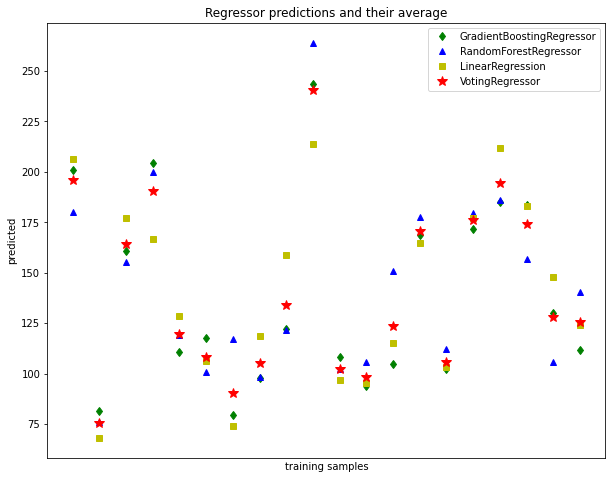

In [ ]:
# Finally, we will visualize the 20 predictions. The red stars show the average prediction made by VotingRegressor.

plt.figure(figsize=(10,8))
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

